<a href="https://colab.research.google.com/github/divas-jindal/AI_IG/blob/master/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3 - Feed Forward Neural Network
###### Author: Divas Jindal - 177117

In [1]:
# import statements
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from tqdm import tqdm

### 1. Making Network

###### Activation Function

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

###### Prediction Function

In [5]:
def predict(X, y, w1, w2, verbose=True, bias=True, show_all=False):
    y_pred = [] 
    
    # run through the network 
    for x in X:
        h = sigmoid(x.dot(w1.T))
        if (bias):
            temp_h = np.append(np.ones(1), h) # we dont want to add a bias term to h itself
        else:
            temp_h = h
        o = sigmoid(temp_h.dot(w2.T))
        y_pred.append(o)
        
    # convert Y and Y_pred back from OH
    y = np.argmax(y, axis=1)
    y_pred = np.argmax(y_pred, axis=1)
                
    if show_all:
        for idx,x in enumerate(X):
            print(f"Predicted => {y_pred[idx]}, Actual => {y[idx]}")
            plt.imshow(x.reshape(28,28))
            plt.show()
    
    # calculate and return accuracy
    accuracy = np.mean(y_pred==y)
    if (verbose):
        print(f"Accuracy => {accuracy*100}")
    return accuracy

###### Backprop Training Function

In [6]:
def backprop(X, Y, n_hid, lr = 0.2,w_init=None,w_scale=1,n_iters=1, batch=False,bias=True):
    if bias:
        # append ones col to X
        ones_col = np.ones((X.shape[0],1))
        X = np.concatenate((ones_col,X), axis=1)
    
    bias_int = 1 if bias else 0 # add 1 to weigt dimension if bias is needed
    
    # create weights
    if w_init is not None:
        w1 = np.ones((n_hid,X.shape[1])) * w_init
        w2 = np.ones((Y.shape[1],n_hid+bias_int)) * w_init
    else:
        w1 = np.random.uniform(size=(n_hid,X.shape[1])) / w_scale
        w2 = np.random.uniform(size=(Y.shape[1],n_hid+bias_int)) / w_scale
            
    history_w1 = [] 
    history_w2 = []
    accuracies = []
    
    # loop over number of iterations
    for i in tqdm(range(n_iters)):
        
        # for each training example 
        for idx, (x,y) in enumerate(zip(X,Y)):
            ### FORWARD PASS
            h = sigmoid(x.dot(w1.T))
            if bias:
                temp_h = np.append(np.ones(1), h) # becuase we dont want to add a bias term to h itself
            else:
                temp_h = h
            o = sigmoid(temp_h.dot(w2.T))
            
            ### BACKWARD PASS
            do = o*(1-o)*(y-o)
            dh = h * (1-h) * do.dot(w2[:,bias_int:]) # skip bias dim if it exists
            
            ### WEIGHT CHANGES
            dw2 = lr * do.reshape(-1,1) * temp_h
            dw1 = lr * dh.reshape(-1,1) *(x) 

            if batch == True:
                history_w1.append(dw1)
                history_w2.append(dw2)
            
            else:
                w2 += dw2
                w1 += dw1
                
        if batch is True:
            w2 += sum(history_w2)
            w1 += sum(history_w1)

        # Check accuracy while training
        accuracies.append(predict(X,Y,w1,w2,verbose=False,bias=bias))
        
    return w1, w2, accuracies

###### XOR:

100%|██████████| 1000/1000 [00:00<00:00, 3531.28it/s]


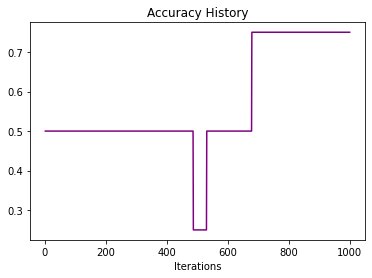

Highest accuracy => 0.75
[[0.29874642 0.71455761 0.8677047 ]
 [0.02028943 0.88018864 0.45632475]] [[ 0.10294202 -0.32066003  0.20035247]
 [-0.08435525  0.06591629  0.08870135]]


In [7]:
w_init = None                 # number of hidden units
w_scale = 1                  # value to divide the w values with
n_hid = 2                    # number of hidden units
lr = 0.01                     # learning rate
n_iters = 1000                  # number of iterations / epochs
batch = False                 # if true, algo uses batch update.
TT = np.asarray([[0,0,0],    # Truth table
                [0,1,1], 
                [1,0,1],
                [1,1,0]])

# get X and y
X = TT[:,:2]
y = TT[:,2:]

# convert y to one hot encoding 
y_OH = np.zeros((y.size, y.max()+1))
y_OH[np.arange(y.size),y.reshape(-1)] = 1

# call backprop function
w1,w2,accuracies = backprop(X,y_OH,n_hid,lr,w_init,w_scale,n_iters,batch)

# print highest accuracy and display history
epochs = np.arange(1, len(accuracies)+1)
plt.plot(epochs, accuracies, c='purple')
plt.title('Accuracy History')
plt.xlabel('Iterations')
plt.show()
print(f"Highest accuracy => {max(accuracies)}")
print(w1,w2)

### 2. Handwritten digit recognition

###### Get digits from MNIST Dataset 

In [8]:
from tensorflow.python.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reduce sizes
num_train = 1000
num_test = 100

X_train = X_train[:num_train]
Y_train = Y_train[:num_train]
X_test = X_test[:num_test]
Y_test = Y_test[:num_test]

# Convert y vectors to one hot 
Y_train_OH = np.zeros((Y_train.size, Y_train.max()+1))
Y_train_OH[np.arange(Y_train.size),Y_train] = 1

Y_test_OH = np.zeros((Y_test.size, Y_test.max()+1))
Y_test_OH[np.arange(Y_test.size),Y_test] = 1

# flatten X and bring into [0,1] range
X_train = X_train.reshape(X_train.shape[0],-1) / 255
X_test = X_test.reshape(X_test.shape[0],-1) / 255

11493376/11490434 [==============================] - 0s 0us/step


100%|██████████| 1000/1000 [06:59<00:00,  2.39it/s]


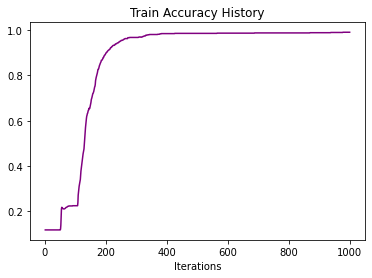

Highest Train accuracy => 0.991
Test Accuracy => 0.85


In [9]:
w_init = None                 # number of hidden units
w_scale = 10                  # value to divide the random w values with
n_hid = 100                    # number of hidden units
lr = 0.01                     # learning rate
n_iters = 1000                  # number of iterations / epochs
batch = False                   # if true, algo uses batch update.
bias = False                   # dont add bias dimension

# call backprop function to train
w1,w2,accuracies = backprop(X_train,Y_train_OH,n_hid,lr,w_init,w_scale,n_iters,batch,bias)

# print highest accuracy and display history
epochs = np.arange(1, len(accuracies)+1)
plt.plot(epochs, accuracies, c='purple')
plt.title('Train Accuracy History')
plt.xlabel('Iterations')
plt.show()
print(f"Highest Train accuracy => {max(accuracies)}")

# test
test_acc = predict(X_test,Y_test_OH,w1,w2,bias=False,verbose=False,show_all=False)
print(f"Test Accuracy => {test_acc}")

### 3. Handwritten Character Recognition

###### Get letters from EMNIST Dataset 

In [10]:
# use pandas to read and convert to numpy
train = pd.read_csv("emnist_letters_train_dataset.csv").to_numpy()
test = pd.read_csv("emnist_letters_test_dataset.csv").to_numpy()

# extract the Xs and Ys
Y_train = train[:,0]
X_train = train[:,1:]
Y_test = test[:,0]
X_test = test[:,1:]

# reduce sizes
num_train = 5000
num_test = 500

X_train = X_train[:num_train]
Y_train = Y_train[:num_train]
X_test = X_test[:num_test]
Y_test = Y_test[:num_test]

# Convert y vectors to one hot vectors
Y_train_OH = np.zeros((Y_train.size, Y_train.max()+1))
Y_train_OH[np.arange(Y_train.size),Y_train] = 1

Y_test_OH = np.zeros((Y_test.size, Y_test.max()+1))
Y_test_OH[np.arange(Y_test.size),Y_test] = 1

# flatten X and bring into [0,1] range
X_train = X_train.reshape(X_train.shape[0],-1) / 255
X_test = X_test.reshape(X_test.shape[0],-1) / 255

100%|██████████| 500/500 [14:26<00:00,  1.73s/it]


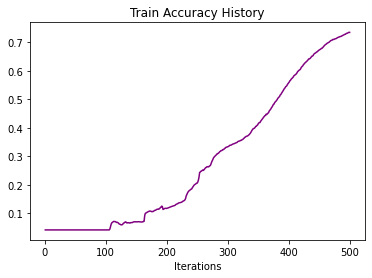

Highest Train accuracy => 0.7353553374962831
Test Accuracy => 0.41


In [11]:
# Hyperparameters
w_init = None                 # number of hidden units
w_scale = 10                  # value to divide the w values with
n_hid = 100                    # number of hidden units
lr = 0.01                     # learning rate
n_iters = 500                  # number of iterations / epochs
batch = False                   # if true, algo uses batch update.
bias = False                   # dont add bias dimension

# call backprop to start training our weights
w1,w2,accuracies = backprop(X_train,Y_train_OH,n_hid,lr,w_init,w_scale,n_iters,batch,bias)

# print highest accuracy and display history
epochs = np.arange(1, len(accuracies)+1)
plt.plot(epochs, accuracies, c='purple')
plt.title('Train Accuracy History')
plt.xlabel('Iterations')
plt.show()
print(f"Highest Train accuracy => {max(accuracies)}")

# check accuracy on test set
test_acc = predict(X_test,Y_test_OH,w1,w2,bias=False,verbose=False,show_all=False)
print(f"Test Accuracy => {test_acc}")